In [5]:

import os
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt


In [8]:
imagePath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\ImageCreation\tmp\PNGImages\image_2023-06-21_17-00-45-485818.png"
maskPath = r"C:\Users\dezos\Documents\Fibres\FibreAnalysis\ImageCreation\tmp\PedMasks\mask_2023-06-21_17-00-45-485818.png"

myImage = Image.open(imagePath)
#mask = Image.open(maskPath).convert('P')
mask = Image.open(maskPath)
print(mask.size)

(1064, 1064)


58
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  20  21  22  24  26  27  28  30  32  33  44  46  58  62  66  68  78  79
  81  82  84  91  93  95  98 102 125 143 144 148 149 153 162 167 171 185
 197 204 207 235]


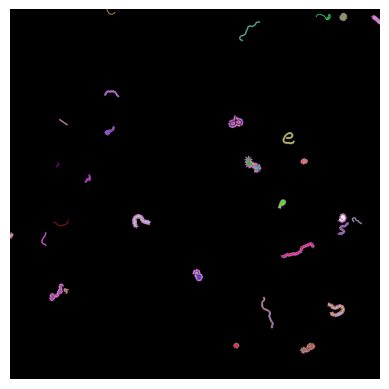

In [10]:
# convert the PIL Image into a numpy array
mask = np.array(mask)

# instances are encoded as different colors
obj_ids = np.unique(mask)
# first id is the background, so remove it
obj_ids = obj_ids[1:]

# split the color-encoded mask into a set
# of binary masks
masks = mask == obj_ids[:, None, None]
num_objs = len(obj_ids)

print(num_objs) 
print(obj_ids)

# Convert the `mask` array to RGB format
rgb_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
for i, obj_id in enumerate(obj_ids):
    rgb_mask[mask == obj_id] = np.random.randint(0, 256, size=3)

# Display the image with color tags
plt.imshow(rgb_mask)
plt.axis('off')
plt.show()

In [21]:
# from PIL import Image

# mask = Image.open(maskPath)

# # Convert the image to 'P' mode (indexed color)
# image = mask.convert('P')

# # Get the colors and their counts
# colors = image.getcolors()

# # Count the unique colors
# num_unique_colors = len(colors)

# print(f"Number of unique colors: {num_unique_colors}")

Number of unique colors: 15


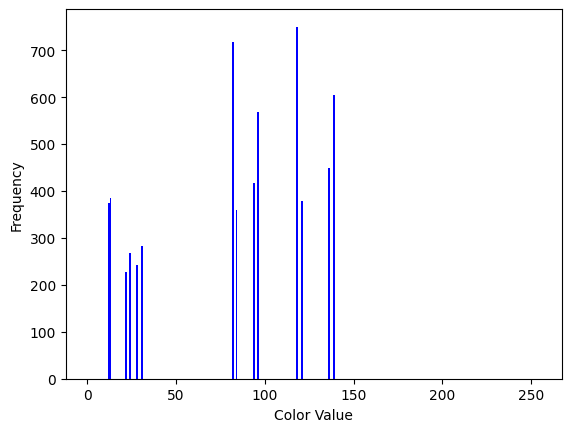

In [31]:
colors = mask.flatten()
histogram, bins = np.histogram(colors, bins=np.arange(1, 256))
plt.bar(bins[:-1], histogram, width=1, color='blue')
plt.xlabel('Color Value')
plt.ylabel('Frequency')
plt.show()

In [30]:
from sklearn.cluster import KMeans

# Reshape the flattened color array to column vector
X = colors.reshape(-1, 1)

# Apply K-means clustering with the desired number of clusters
kmeans = KMeans(n_clusters=12)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the number of distinct clusters
num_clusters = len(np.unique(labels))
print(f"Number of distinct clusters: {num_clusters}")

c:\Users\dezos\Documents\Fibres\FibreAnalysis\Fibres1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of distinct clusters: 12
